# **Regex**

In [22]:
from google.colab import files 
  
uploaded = files.upload()

Saving LFA_twitch.csv to LFA_twitch (1).csv


In [25]:
import pandas as pd 
import io 
import re
  
#tabelaTwitch = pd.read_csv('LFA_twitch.csv')

In [ ]:
#lista de palvrões
lista_palavroes = [
    "evil",
    "fuck",
    "shit",
    "asshole",
    "bitch",
    "dick",
    "damn",
    "bastard",
    "cunt",
    "motherfucker",
    "cock",
    "piss",
    "twat",
    "douchebag",
    "asshat",
    "prick",
    "wanker",
    "slut",
    "whore",
    "dipshit",
    "dickhead",
    "jerk",
    "idiot",
    "moron",
    "stupid",
    "dumbass",
    "fuckface",
    "cocksucker",
    "asswipe",
    "shithead",
    "assclown",
    "douche",
    "fuckwit",
    "jackass",
    "son of a bitch",
    "bullshit",
    "wankstain",
    "fucktard",
    "pussy",
    "bugger",
    "bloody hell",
    "arsehole",
    "freaking",
    "frigging",
    "screw you",
    "screw off",
    "sod off",
    "suck it",
    "dickwad",
    "nutjob",
    "knobhead",
    "turd",
    "knucklehead",
    "dingleberry",
    "douchecanoe",
    "nutcase",
    "butt munch",
    "assnugget",
    "arsewipe",
    "cockwomble",
    "wankshaft",
    "tosser",
    "gobshite",
    "piss off",
    "pisshead",
    "penis",
    "bumfluff",
    "shitehawk",
    "shit-for-brains",
    "numbnuts",
    "dumbbell",
    "fool",
    "jerkface",
    "prickhead",
    "numpty",
    "shitbag",
    "muppet",
    "assface",
    "dickweed",
    "numb-nuts",
    "twatwaffle",
    "clusterfuck",
    "cuntface",
    "dumbshit",
    "shitstain",
    "lunatic",
    "waste of space",
    "bogus",
    "cockbite",
    "dickbag",
    "knob",
    "cheesehead",
    "plonker",
    "arse-nugget",
    "wankerstick",
    "asshatery",
    "douchenozzle",
    "cockwaffle"]

# Carregando a base de dados de comentários a partir de um arquivo CSV e armazenando-a em um dataset chamado "tabelaTwitch"
tabelaTwitch = pd.read_csv('LFA_twitch.csv')


# Criando uma expressão regular para buscar palavrões nos comentários. A expressão regular é formada pela junção dos palavrões separados por "|",
# onde "\b" é usado para delimitar as palavras inteiras.
regex = r"\b(" + "|".join(lista_palavroes) + r")\b"

# Aplicando a expressão regular a cada comentário da coluna "comment_text" do dataset "tabelaTwitch".
# A função "re.findall()" encontra todas as correspondências de palavrões em cada comentário, ignorando as diferenças entre letras maiúsculas e minúsculas.
# Os resultados são armazenados na nova coluna "xingamentos" do dataset.
tabelaTwitch["xingamentos"] = tabelaTwitch["comment_text"].apply(lambda x: re.findall(regex, str(x), re.IGNORECASE))

# Filtrando o dataset "dados" para obter apenas os comentários que têm xingamentos, ou seja, aqueles em que a lista de xingamentos não está vazia.
# O resultado é armazenado no dataset "comentarios_com_xingamentos".
comentarios_com_xingamentos = tabelaTwitch[tabelaTwitch["xingamentos"].str.len() > 0]

# Exibindo os comentários que contêm xingamentos.
print(comentarios_com_xingamentos)

# **Análises**

**1. Frequência de palavrões em comentários**

In [12]:
lista_xingamentos = comentarios_com_xingamentos["xingamentos"].tolist()

In [13]:
from collections import Counter

frequencia_xingamentos = Counter([xingamento for sublist in lista_xingamentos for xingamento in sublist])

In [14]:
palavras_ordenadas = sorted(frequencia_xingamentos.items(), key=lambda x: x[1], reverse=True)

for palavra, frequencia in palavras_ordenadas:
    print(f"{palavra}: {frequencia}")

fuck: 51
cunt: 22
Fuck: 20
penis: 17
stupid: 13
shit: 11
asshole: 4
bitch: 4
moron: 3
idiot: 3
Evil: 3
slut: 2
BITCH: 2
DICK: 2
wanker: 2
pussy: 2
damn: 2
Moron: 2
bastard: 2
cock: 2
evil: 1
muppet: 1
Motherfucker: 1
fucktard: 1
jackass: 1
EVIL: 1
SHIT: 1
fuckwit: 1
freaking: 1
motherfucker: 1
whore: 1
jerk: 1
FUCK: 1
bullshit: 1
plonker: 1
Bastard: 1
dick: 1
dipshit: 1
Cunt: 1
fool: 1
Dick: 1


2. Esse é o total de comentários toxicos definidos pela coluna de classificação 'toxic'

In [15]:
# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('LFA_twitch.csv')
# Especificando o valor desejado
valor_especifico = 1
# Fazendo o count do valor específico na coluna desejada
RotulosVerdadeiros = df['toxic'].value_counts()[valor_especifico]
# Exibindo o resultado
print(f'Total de comentários com xingamento: {RotulosVerdadeiros}')

Total de comentários com xingamento: 84


3. Total de comentários não tóxicos

In [16]:
# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('LFA_twitch.csv')
# Especificando o valor desejado
valor_especifico = 0
# Fazendo o count do valor específico na coluna desejada
RotulosFalsos = df['toxic'].value_counts()[valor_especifico]
# Exibindo o resultado
print(f'Total de comentários não tóxicos: {RotulosFalsos}')

Total de comentários não tóxicos: 916


**4. Total de comentários toxicos identificados pelo regex com a lista de palavrões.**

In [29]:
# Count do total de comentarios_com_xingamentos
total_comentarios_com_xingamentos = len(comentarios_com_xingamentos)
# Exibindo o resultado
print(f'Total de comentários encontrados pelo regex: {total_comentarios_com_xingamentos}')

Total de comentários encontrados pelo regex: 67


5. Filtrando somente os que deram **VERDADEIRO POSITIVO**

In [ ]:
# Filtrando apenas os comentários com xingamentos e toxicidade igual a 1
comentarios_filtrados = comentarios_com_xingamentos[comentarios_com_xingamentos['toxic'] == 1]
# Exibindo os comentários filtrados
print(comentarios_filtrados)


6. Total de cometários com verdadeiro positivo encontrados

In [31]:
# Filtrando apenas os comentários com xingamentos e toxicidade igual a 1
comentarios_filtrados = comentarios_com_xingamentos[comentarios_com_xingamentos['toxic'] == 1]
# Obtendo a contagem de comentários filtrados
VP = len(comentarios_filtrados)
# Exibindo a contagem de comentários filtrados
print(f"Verdadeiro Positivo: {VP}")

Verdadeiro Positivo: 50


**Falso positivo**

In [ ]:
# Filtrando apenas os comentários com xingamentos e toxicidade igual a 1
comentarios_filtrados = comentarios_com_xingamentos[comentarios_com_xingamentos['toxic'] == 0]
# Exibindo os comentários filtrados
print(comentarios_filtrados)

In [35]:
# Filtrando apenas os comentários com xingamentos e toxicidade igual a 1
comentarios_filtrados = comentarios_com_xingamentos[comentarios_com_xingamentos['toxic'] == 0]
# Obtendo a contagem de comentários filtrados
FP = len(comentarios_filtrados)
# Exibindo a contagem de comentários filtrados
print(f"Falso Positivo: {FP}")

Falso Positivo: 17


Percentual de verdadeiro positivo alcançados do total

In [37]:
# Contagem total de comentários tóxicos
total_comentarios_toxicos = tabelaTwitch['toxic'].sum()
# Cálculo da porcentagem
porcentagem_alcancada = (VP / total_comentarios_toxicos) * 100
# Exibindo a porcentagem alcançada
print(f"A porcentagem alcançada do total de comentários tóxicos é de: {porcentagem_alcancada:.2f}%")

A porcentagem alcançada do total de comentários tóxicos é de: 59.52%


**Matrix de confusão**


Explicação dos componentes da matrix de confusão

- Verdadeiro positivo (TP): representa os casos em 
que o modelo previu corretamente uma determinada classe como positiva.

- Verdadeiro negativo (TN): representa os casos em que o modelo previu corretamente uma determinada classe como negativa.

- Falso positivo (FP): representa os casos em que o modelo erroneamente previu uma determinada classe como positiva, quando na verdade era negativa.

- Falso negativo (FN): representa os casos em que o modelo erroneamente previu uma determinada classe como negativa, quando na verdade era positiva.



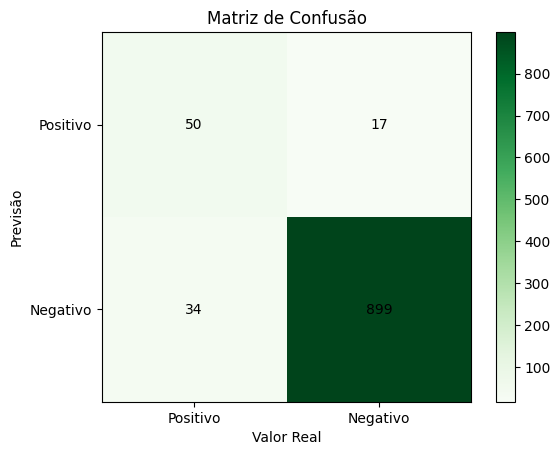

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def criar_matriz_confusao(T, N, TP, FP):
    FN = T - VP #Falso negativo
    VN = N - FP #Verdadeiro negativo
    
    matriz_confusao = np.array([[TP, FP], [FN, VN]])
    
    return matriz_confusao
# Dados da matriz de confusão
T = 84  # Total de comentários tóxicos
N = 916  # Total de comentários não tóxicos
VP = 50  # Verdadeiros positivos
FP = 17  # Falsos positivos
# Criar matriz de confusão
matriz = criar_matriz_confusao(T, N, VP, FP)
# Criar rótulos para os eixos x e y
classes = ['Positivo', 'Negativo']
rotulos = ['Positivo', 'Negativo']
# Plotar matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(matriz, cmap='Greens')
# Adicionar texto nas células da matriz
for i in range(len(classes)):
    for j in range(len(rotulos)):
        text = ax.text(j, i, matriz[i, j], ha='center', va='center', color='black')
# Configurar eixos
ax.set_xticks(np.arange(len(rotulos)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(rotulos)
ax.set_yticklabels(classes)
ax.set_xlabel('Valor Real')
ax.set_ylabel('Previsão')

# Adicionar barra de cores
cbar = ax.figure.colorbar(im, ax=ax)
# Definir título do gráfico
ax.set_title('Matriz de Confusão')
# Exibir gráfico
plt.show()


**Acuracia**

A acurácia é uma medida de desempenho de um modelo de classificação que geralmente é expressa como uma porcentagem. Ela indica a proporção de previsões corretas em relação ao total de exemplos.

In [39]:
VP = 50  # Verdadeiros positivos
VN = 899 #Verdadeiro Negativo
FP = 17  # Falsos positivo
FN = 36 #Falso negativo

Acuracia = ((VP + VN) / (VP + VN + FP + FN)) * 100
print(f"Acurácia: {Acuracia:.2f}%")

Acurácia: 94.71%


**Taxa de correspondência (Match Rate)**

A taxa de correspondência indica a proporção de strings que são correspondidas pela expressão regular em relação ao total de strings analisadas.

In [40]:
# Calculando a taxa de correspondência (Match Rate)
taxa_correspondencia = len(comentarios_com_xingamentos) / len(tabelaTwitch) * 100

# Exibindo a taxa de correspondência
print("Taxa de correspondência: {:.2f}%".format(taxa_correspondencia))


Taxa de correspondência: 6.70%


**Precision = VP / (VP + FP)**


A precisão (Precision) é uma medida de desempenho de um modelo de classificação que indica a proporção de instâncias classificadas como positivas corretamente em relação ao total de instâncias classificadas como positivas.

A fórmula da precisão é dada por:

Precision = VP / (VP + FP)

Onde:

- VP (True Positives) é o número de verdadeiros positivos, ou seja, o número de instâncias corretamente classificadas como positivas.
- FP (False Positives) é o número de falsos positivos, ou seja, o número de instâncias incorretamente classificadas como positivas.
A precisão é calculada dividindo o número de verdadeiros positivos pelo total de instâncias classificadas como positivas (soma dos verdadeiros positivos e falsos positivos).

A precisão é uma medida importante quando o foco está em minimizar os falsos positivos, ou seja, quando é crucial evitar classificar erroneamente instâncias negativas como positivas. Ela fornece uma indicação de quão precisa é a classificação do modelo em relação às instâncias positivas. No entanto, a precisão por si só pode não fornecer uma imagem completa do desempenho do modelo, especialmente se o conjunto de dados estiver desequilibrado. Nesses casos, é necessário considerar outras medidas de desempenho, como a taxa de verdadeiros positivos (recall) e a medida F1.



In [41]:
Precision = (VP / (VP + FP)) * 100

print (f'Precision: {Precision:.2f}%')

Precision: 74.63%
